In [1]:
import os 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/varun/OneDrive/Desktop/python/Regression/logistic reg')

In [3]:
a = pd.read_csv('Default.csv')

In [4]:
a.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
a.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [6]:
a['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [7]:
a['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [8]:
a.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


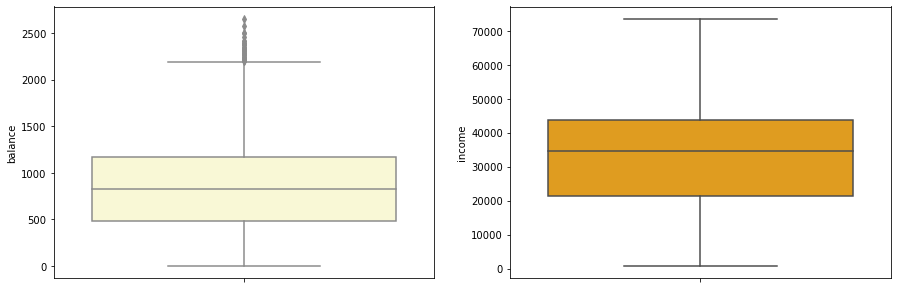

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'balance',data=a,color='#FFFDD0')

plt.subplot(1,2,2)
sns.boxplot(y='income',data=a,color='orange')
plt.show()

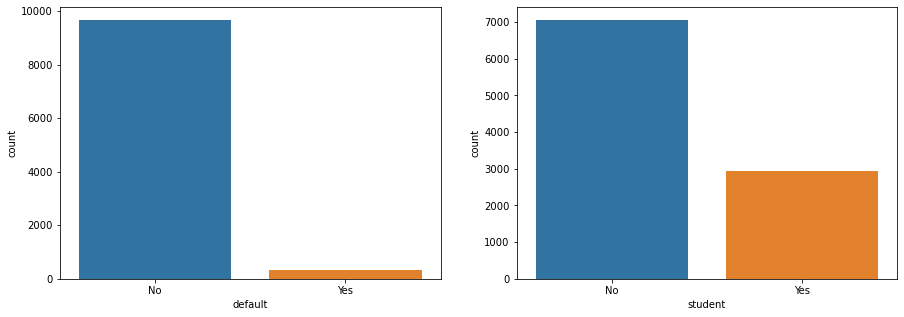

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = 'default',data=a)

plt.subplot(1,2,2)
sns.countplot(x='student',data=a)
plt.show()

In [11]:
pd.crosstab(a['student'],a['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


In [12]:
Q1,Q3 = a['balance'].quantile([0.25,0.75])
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [13]:
UL


2193.1743093

### identifying the outliers

In [14]:
b= a[a['balance']>UL]

In [15]:
b

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492250
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519750
1359,Yes,No,2220.966201,40725.096210
1502,Yes,Yes,2332.878254,11770.234120
1609,Yes,Yes,2269.946966,18021.105950
2096,Yes,Yes,2261.848162,20030.165120
2140,No,Yes,2308.893236,19110.266410
2929,Yes,Yes,2387.314867,28296.914720
3162,Yes,Yes,2415.316994,17429.503370


In [16]:
b['default'].count()

31

In [17]:
b['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

### Removing the outliers

In [18]:
a['balance']=np.where(a['balance']>UL,UL,a['balance'])

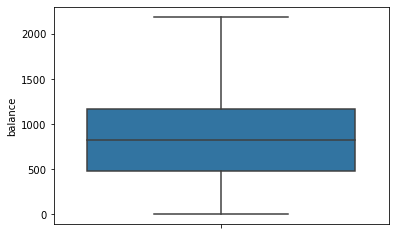

In [19]:
sns.boxplot(y=a['balance'])
plt.show()

In [20]:
a = pd.get_dummies(a,drop_first=True)

In [21]:
a.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [22]:
a.columns=['balance','income','default','student']

In [23]:
a.head()

,balance,income,default,student
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=a.drop('default',axis=1)

In [26]:
y = a['default']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,stratify=y)

In [28]:
print(y_train.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64


In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33,sampling_strategy=0.75)
x_res,y_res=sm.fit_resample(x_train,y_train)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_res,y_res)

LogisticRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[1753,  664],
       [  23,   60]], dtype=int64)

In [36]:
acc = (1753+60)/(1753+664+23+60)

In [37]:
acc

0.7252